## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data 
#### 2. Data Wrangling and Standardizing
#### 3. The elbow technique
#### 4. k-means clustering

### Importing libraries and data 

In [1]:
##01 Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
##02 Makin sure sklearn is current version
sklearn.__version__

'1.0.2'

In [3]:
##03 This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
##04 Importing cleaned df
df = pd.read_csv('/Users/emmawilcox/Desktop/camper_grouped_distance.csv')

### Data wrangling and standardizing

In [6]:
##05 Looking for nulls
df.isnull().sum()


Unnamed: 0              0
agency                  0
regioncode              0
regiondescription       0
parentlocation          0
park                    0
sitetype                0
usetype                 0
inventorytype           0
facilityid              0
facilityzip             0
facilitystate           0
facilitylongitude       0
facilitylatitude        0
customerzip             0
totalbeforetax          0
nights                  0
numberofpeople          0
equipmentdescription    0
clean_startdate         0
clean_enddate           0
customerstate           0
distance                0
customerstate_full      0
Size of Group           0
Driving Distance        0
Cost Range              0
Length of Stay          0
dtype: int64

In [7]:
##06 Reducing df to just columns needed Part 1
columns_to_keep2 = ['distance', 'nights', 'numberofpeople', 'totalbeforetax']

In [9]:
##07 Reducing df to just columns needed Part 2
df = df[columns_to_keep2]

In [10]:
##08 Looking at size of df, it is still meaningful in scale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692421 entries, 0 to 1692420
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   distance        float64
 1   nights          int64  
 2   numberofpeople  int64  
 3   totalbeforetax  float64
dtypes: float64(2), int64(2)
memory usage: 51.6 MB


In [11]:
##09 Z-Score using pandas
df['distance'] = (df['distance'] - df['distance'].mean()) / df['distance'].std()

In [12]:
##10 Rest of standardizing
df['nights'] = (df['nights'] - df['nights'].mean()) / df['nights'].std()
df['numberofpeople'] = (df['numberofpeople'] - df['numberofpeople'].mean()) / df['numberofpeople'].std()
df['totalbeforetax'] = (df['totalbeforetax'] - df['totalbeforetax'].mean()) / df['totalbeforetax'].std()

### The elbow technique

In [13]:
##11
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
##12
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6769679.99999053,
 -5012843.345507424,
 -3830474.830150453,
 -2941411.00389946,
 -2516344.350365323,
 -2268055.610991199,
 -2052285.4674524888,
 -1840187.0231245523,
 -1646233.6564809075]

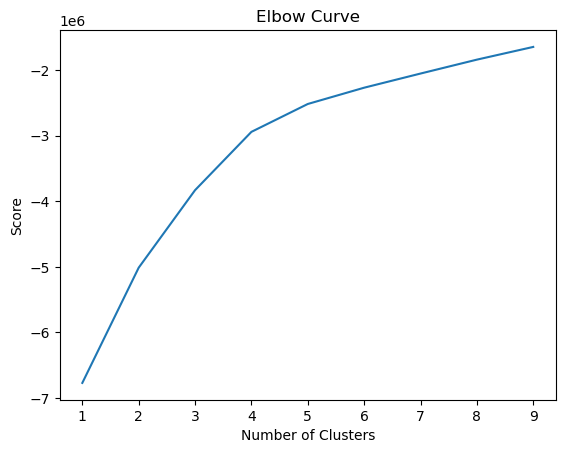

In [15]:
##13 Plot the elbow curve using PyLab.
## I am using 5 clusters

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [16]:
##14 Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [17]:
##15 Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [18]:
##16 
df['clusters'] = kmeans.fit_predict(df)

In [19]:
##17 Looking at standardized data with clusters column
df.head()

,distance,nights,numberofpeople,totalbeforetax,clusters
0,-0.322433,0.700611,1.966739,2.452466,4
1,-0.461423,-0.485956,0.098618,0.505940,1
2,-0.362923,-0.485956,1.966739,0.505940,1
3,1.121893,-0.881478,0.565648,-0.142902,1
4,-0.431382,-0.090434,1.966739,1.154782,4


In [20]:
##18 Looking at size of clusters, one is over a million people out of 1.7 million in df
df['clusters'].value_counts()

1    1114200
4     343075
2     163372
0      66381
3       5393
Name: clusters, dtype: int64

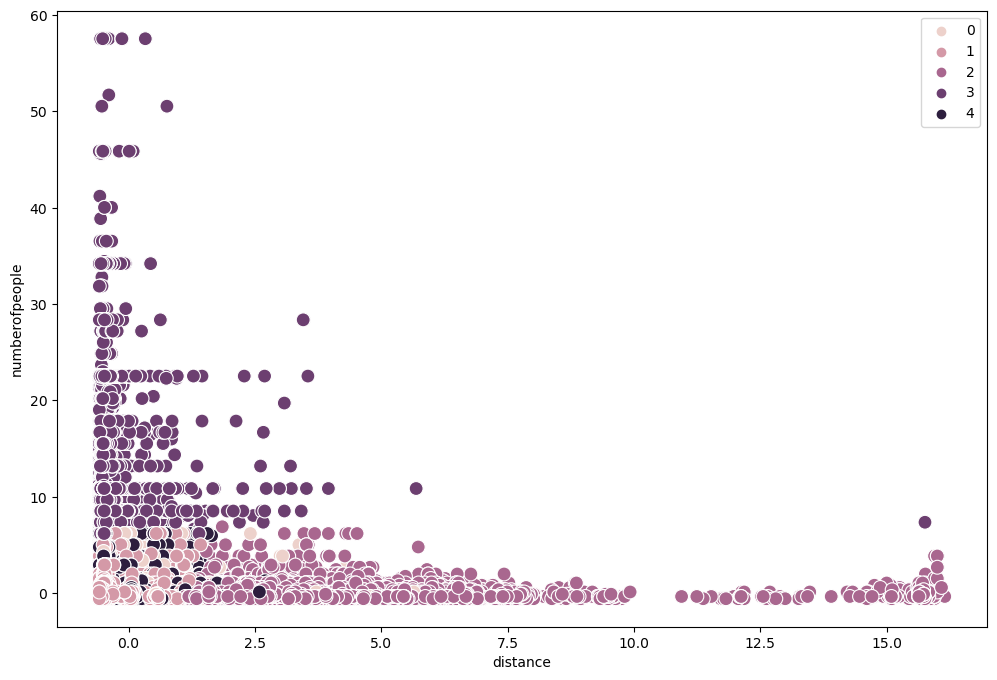

In [21]:
##19 Plot the clusters for the "distance" and "numberofpeople" variables.


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['distance'], y=df['numberofpeople'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('distance') # Label x-axis.
plt.ylabel('numberofpeople') # Label y-axis.
plt.show()

The largest cluster (1/Pink), is concentrated near short stays and small groups

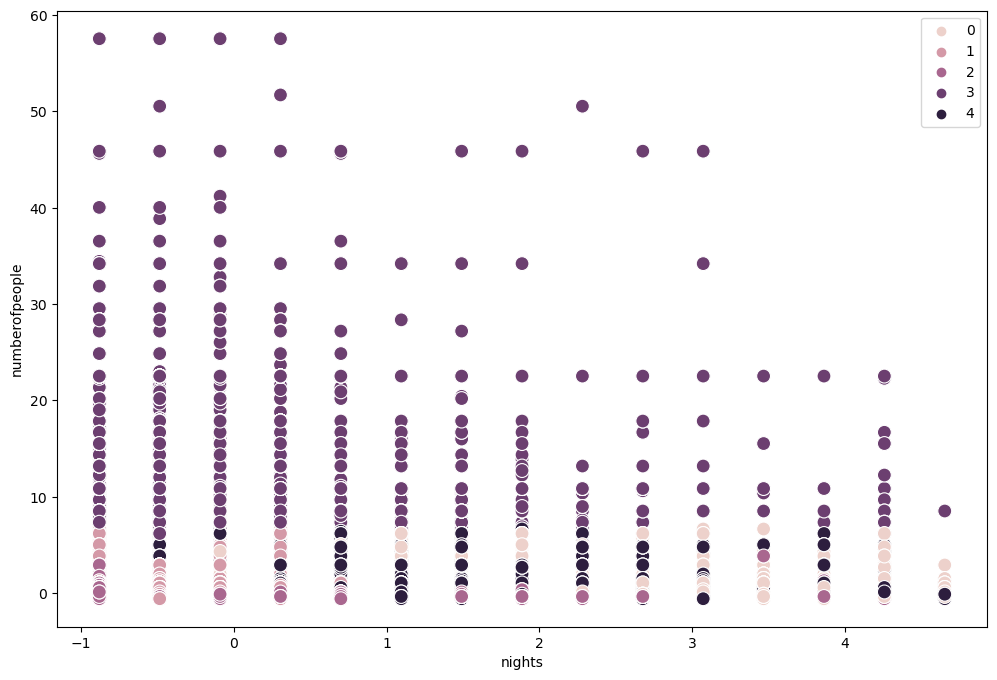

In [22]:
##20 Plot the clusters for the "nights" and "numberofpeople" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['nights'], y=df['numberofpeople'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('nights') 
plt.ylabel('numberofpeople') 
plt.show()

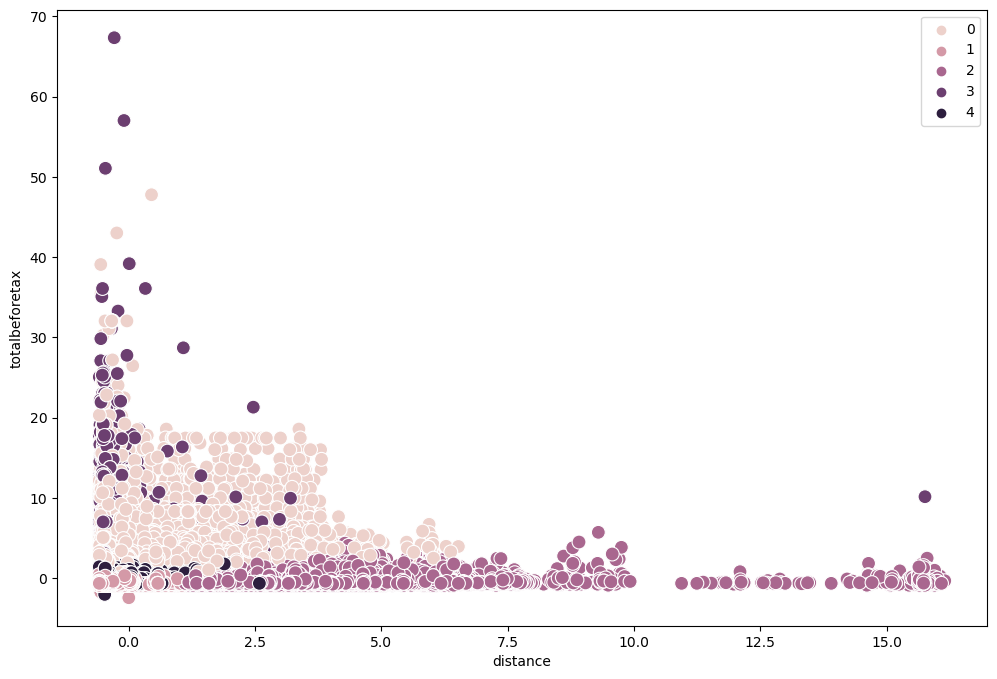

In [23]:
##21 Plot the clusters for the "distance" and "totalbeforetax" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['distance'], y=df['totalbeforetax'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('distance') # Label x-axis.
plt.ylabel('totalbeforetax') # Label y-axis.
plt.show()

Some customers pay quite a bit more for their stays of similarly short distances, also distances of varying mileage seem to cost the same in some cases.

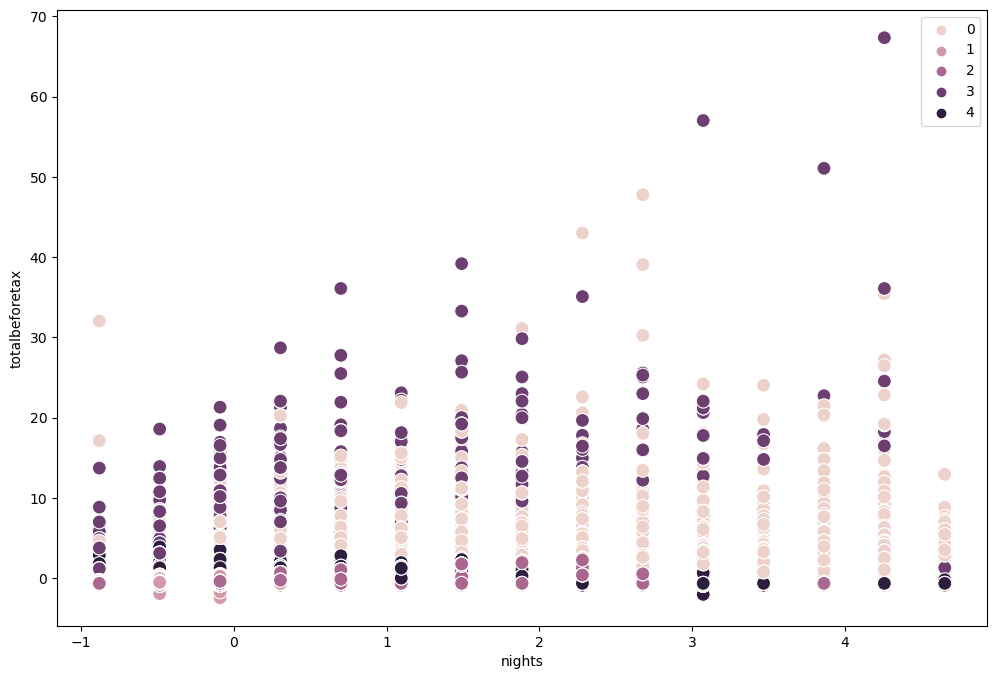

In [24]:
##22 Plot the clusters for the "nights" and "totalpaid" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['nights'], y=df['totalbeforetax'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('nights') # Label x-axis.
plt.ylabel('totalbeforetax') # Label y-axis.
plt.show()

Based on the count of clustered values, the 3rd largest group in df is for the smaller groups, staying the longest and paying the highest median cost. This suggests where the profit is. The second largest cluster is the lowest-paying group, with short stays. Slightly over half of customer stays are larger ones, with less diversity in terms of what is paid.

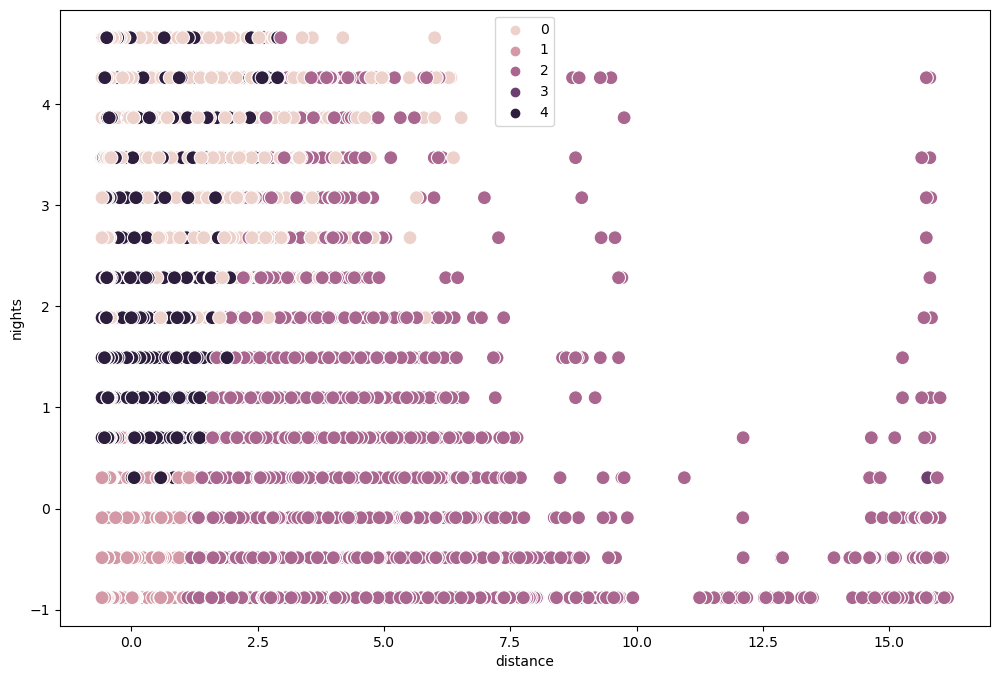

In [26]:
##23 Plot the clusters for the "distance" and "nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['distance'], y=df['nights'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('distance') # Label x-axis.
plt.ylabel('nights') # Label y-axis.
plt.show()

In [27]:
##24 Naming clusters by color not number
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 1, 'cluster'] =  'pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'black'


In [28]:
##25 Looking at descriptive stats for the clusters
df.groupby('cluster').agg({'distance':['mean', 'median'], 
                         'numberofpeople':['mean', 'median'], 
                         'nights':['mean', 'median'],
                          'totalbeforetax':['mean', 'median']})

distance           numberofpeople               nights            \
                mean    median           mean     median      mean    median   
cluster                                                                        
black      -0.262065 -0.443104       0.009745  -0.368413  0.924715  0.700611   
dark pink   2.552875  2.329029      -0.255056  -0.368413 -0.452563 -0.485956   
light pink -0.101473 -0.439699       0.037710  -0.368413  3.044350  3.073743   
pink       -0.285790 -0.445967      -0.029708  -0.368413 -0.399295 -0.485956   
purple     -0.370313 -0.462395      12.780183  10.840314 -0.093367 -0.090434   

           totalbeforetax            
                     mean    median  
cluster                              
black            0.607848  0.661662  
dark pink       -0.325424 -0.506253  
light pink       3.271469  2.919633  
pink            -0.351506 -0.376485  
purple           3.543874  2.841772

In [29]:
##26 More stats
df.groupby('cluster').max()

,distance,nights,numberofpeople,totalbeforetax,clusters
cluster,,,,,
black,2.894596,4.655831,6.637042,3.970757,4
dark pink,16.151190,4.655831,6.870557,5.696677,2
light pink,6.525737,4.655831,6.637042,47.767597,0
pink,1.544402,0.700611,6.870557,1.544088,1
purple,15.759963,4.655831,57.543344,67.336674,3


In [30]:
##27 More stats
df.groupby('cluster').min()

,distance,nights,numberofpeople,totalbeforetax,clusters
cluster,,,,,
black,-0.580943,-0.881478,-0.601928,-2.037521,4
dark pink,1.087402,-0.881478,-0.601928,-0.895559,2
light pink,-0.580943,-0.881478,-0.601928,0.181519,0
pink,-0.580943,-0.881478,-0.601928,-2.452780,1
purple,-0.580943,-0.881478,5.936496,-0.895559,3


In [32]:
##28 Ordering stats so I can identify notable features to describe clusters


result = df.groupby('cluster').agg({
    'distance': ['mean', 'median'],
    'numberofpeople': ['mean', 'median'],
    'nights': ['mean', 'median'],
    'totalbeforetax': ['mean', 'median']
})

# Sort by mean distance in ascending order
sorted_result = result.sort_values(('distance', 'mean'))

print(sorted_result)

            distance           numberofpeople               nights            \
                mean    median           mean     median      mean    median   
cluster                                                                        
purple     -0.370313 -0.462395      12.780183  10.840314 -0.093367 -0.090434   
pink       -0.285790 -0.445967      -0.029708  -0.368413 -0.399295 -0.485956   
black      -0.262065 -0.443104       0.009745  -0.368413  0.924715  0.700611   
light pink -0.101473 -0.439699       0.037710  -0.368413  3.044350  3.073743   
dark pink   2.552875  2.329029      -0.255056  -0.368413 -0.452563 -0.485956   

           totalbeforetax            
                     mean    median  
cluster                              
purple           3.543874  2.841772  
pink            -0.351506 -0.376485  
black            0.607848  0.661662  
light pink       3.271469  2.919633  
dark pink       -0.325424 -0.506253  


In [33]:
##29 Ordering stats so I can identify notable features to describe clusters
result = df.groupby('cluster').agg({
    'distance': ['mean', 'median'],
    'numberofpeople': ['mean', 'median'],
    'nights': ['mean', 'median'],
    'totalbeforetax': ['mean', 'median']
})

# Sort by mean distance in ascending order
sorted_result = result.sort_values(('numberofpeople', 'mean'))

print(sorted_result)

            distance           numberofpeople               nights            \
                mean    median           mean     median      mean    median   
cluster                                                                        
dark pink   2.552875  2.329029      -0.255056  -0.368413 -0.452563 -0.485956   
pink       -0.285790 -0.445967      -0.029708  -0.368413 -0.399295 -0.485956   
black      -0.262065 -0.443104       0.009745  -0.368413  0.924715  0.700611   
light pink -0.101473 -0.439699       0.037710  -0.368413  3.044350  3.073743   
purple     -0.370313 -0.462395      12.780183  10.840314 -0.093367 -0.090434   

           totalbeforetax            
                     mean    median  
cluster                              
dark pink       -0.325424 -0.506253  
pink            -0.351506 -0.376485  
black            0.607848  0.661662  
light pink       3.271469  2.919633  
purple           3.543874  2.841772  


In [34]:
##30 Ordering stats so I can identify notable features to describe clusters
result = df.groupby('cluster').agg({
    'distance': ['mean', 'median'],
    'numberofpeople': ['mean', 'median'],
    'nights': ['mean', 'median'],
    'totalbeforetax': ['mean', 'median']
})

# Sort by mean distance in ascending order
sorted_result = result.sort_values(('nights', 'mean'))

print(sorted_result)

            distance           numberofpeople               nights            \
                mean    median           mean     median      mean    median   
cluster                                                                        
dark pink   2.552875  2.329029      -0.255056  -0.368413 -0.452563 -0.485956   
pink       -0.285790 -0.445967      -0.029708  -0.368413 -0.399295 -0.485956   
purple     -0.370313 -0.462395      12.780183  10.840314 -0.093367 -0.090434   
black      -0.262065 -0.443104       0.009745  -0.368413  0.924715  0.700611   
light pink -0.101473 -0.439699       0.037710  -0.368413  3.044350  3.073743   

           totalbeforetax            
                     mean    median  
cluster                              
dark pink       -0.325424 -0.506253  
pink            -0.351506 -0.376485  
purple           3.543874  2.841772  
black            0.607848  0.661662  
light pink       3.271469  2.919633  


In [35]:
##31 Ordering stats so I can identify notable features to describe clusters
result = df.groupby('cluster').agg({
    'distance': ['mean', 'median'],
    'numberofpeople': ['mean', 'median'],
    'nights': ['mean', 'median'],
    'totalbeforetax': ['mean', 'median']
})

# Sort by mean distance in ascending order
sorted_result = result.sort_values(('totalbeforetax', 'mean'))

print(sorted_result)

            distance           numberofpeople               nights            \
                mean    median           mean     median      mean    median   
cluster                                                                        
pink       -0.285790 -0.445967      -0.029708  -0.368413 -0.399295 -0.485956   
dark pink   2.552875  2.329029      -0.255056  -0.368413 -0.452563 -0.485956   
black      -0.262065 -0.443104       0.009745  -0.368413  0.924715  0.700611   
light pink -0.101473 -0.439699       0.037710  -0.368413  3.044350  3.073743   
purple     -0.370313 -0.462395      12.780183  10.840314 -0.093367 -0.090434   

           totalbeforetax            
                     mean    median  
cluster                              
pink            -0.351506 -0.376485  
dark pink       -0.325424 -0.506253  
black            0.607848  0.661662  
light pink       3.271469  2.919633  
purple           3.543874  2.841772  


In [37]:
##32 Defining "path" as a shortcut to the main Instacart folder on my desktop
path = r'/Users/emmawilcox/Desktop'

In [39]:
##33 Exporting clusters
df.to_csv(os.path.join(path, 'camper_clusters.csv'))